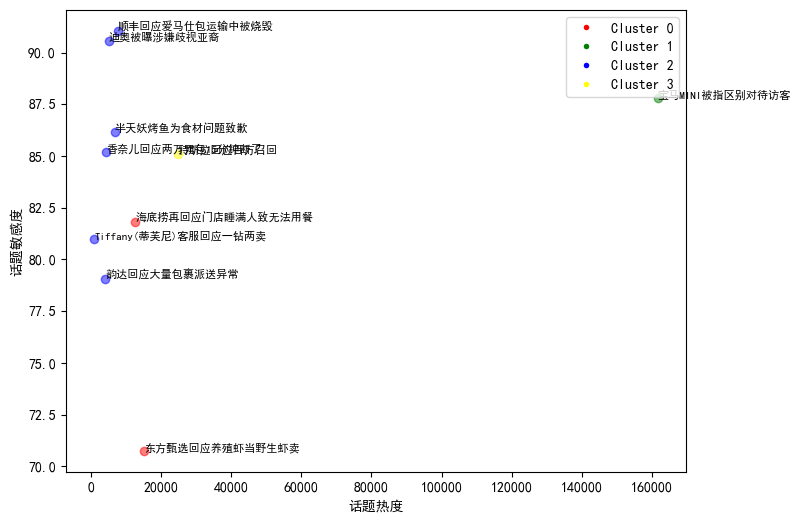

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']
# 创建数据
data = {
    '热点事件': [
        "顺丰回应爱马仕包运输中被烧毁",
        "特斯拉回应百万召回",
        "半天妖烤鱼为食材问题致歉",
        "香奈儿回应两万元包15分钟断了",
        "东方甄选回应养殖虾当野生虾卖",
        "Tiffany(蒂芙尼)客服回应一钻两卖",
        "宝马MINI被指区别对待访客",
        "韵达回应大量包裹派送异常",
        "海底捞再回应门店睡满人致无法用餐",
        "迪奥被曝涉嫌歧视亚裔"
    ],
    '舆情声量': [
        9798, 38712, 7103, 5214, 22774, 1155, 269397, 6079, 18028, 6673
    ],
    '相关热搜热度': [
        4657.38, 4022.4, 6584.44, 2960.03, 3615.48, 532.38, 11.12, 942.7, 4687.35, 2987.73
    ],
    '话题敏感度': [
        91.05, 85.11, 86.16, 85.18, 70.75, 80.98, 87.8, 79.07, 81.83, 90.55
    ]
}

df = pd.DataFrame(data)

# 计算话题热度得分
weight1 = 0.6  # 舆情声量的权重
weight2 = 0.4  # 相关热搜热度的权重

df['话题热度'] = (weight1 * df['舆情声量']) + (weight2 * df['相关热搜热度'])

# 特征选择
features = ['话题热度', '话题敏感度']
X = df[features].values

# 使用k-means聚类算法
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# 获取聚类结果标签
labels = kmeans.labels_

# 添加聚类结果标签列
df['聚类结果'] = labels

# 绘制散点图
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue','yellow']
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color=colors[labels[i]], alpha=0.5)

# 添加数据标签
for i in range(len(X)):
    plt.text(X[i][0], X[i][1], df['热点事件'][i], fontsize=8)

# 设置坐标轴标签
plt.xlabel('话题热度')
plt.ylabel('话题敏感度')

# 显示图例
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=5),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=5)]
plt.legend(legend_elements, ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3'])

# 显示图形
plt.show()


In [8]:
# 获取每个聚类类别的热点事件
cluster_labels = df['聚类结果'].unique()
for label in cluster_labels:
    cluster_data = df[df['聚类结果'] == label]
    hot_events = cluster_data['热点事件'].values
    print(f"聚类 {label} 的热点事件:")
    for event in hot_events:
        print(event)
    print()


聚类 2 的热点事件:
顺丰回应爱马仕包运输中被烧毁
半天妖烤鱼为食材问题致歉
香奈儿回应两万元包15分钟断了
Tiffany(蒂芙尼)客服回应一钻两卖
韵达回应大量包裹派送异常
迪奥被曝涉嫌歧视亚裔

聚类 3 的热点事件:
特斯拉回应百万召回

聚类 0 的热点事件:
东方甄选回应养殖虾当野生虾卖
海底捞再回应门店睡满人致无法用餐

聚类 1 的热点事件:
宝马MINI被指区别对待访客

